In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [62]:
df = pd.read_excel(r"C:\Users\Administrator\Desktop\data analytics by tata group\Online Retail.xlsx")

In [63]:
df.head(10)
df.shape

(541909, 8)

In [64]:
x = "UnitPrice"
print(df[df[x] >= 0])
print("yes")
df.shape


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

(541909, 8)

In [69]:
x = "UnitPrice"

df = df[df[x] >= 0]

print("Rows with 'UnitPrice' less than 0 have been removed")

df.shape

Rows with 'UnitPrice' less than 0 have been removed


(531283, 8)

In [67]:
x = "Quantity"
print(df[df[x] >= 1])
print("yes")
df.shape


       InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      

(531283, 8)

In [72]:
x = "Quantity"

df = df[df[x] >= 1]

print("Rows with 'Quantity' less than 1 have been removed")

df.shape

Rows with 'Quantity' less than 1 have been removed


(531283, 8)

In [92]:


# Convert 'InvoiceDate' to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Filter data for the year 2011 and create a copy to avoid SettingWithCopyWarning
df_2011 = df[df['InvoiceDate'].dt.year == 2011].copy()

# Calculate revenue for each transaction
df_2011['Revenue'] = df_2011['Quantity'] * df_2011['UnitPrice']

df.shape





(531283, 8)

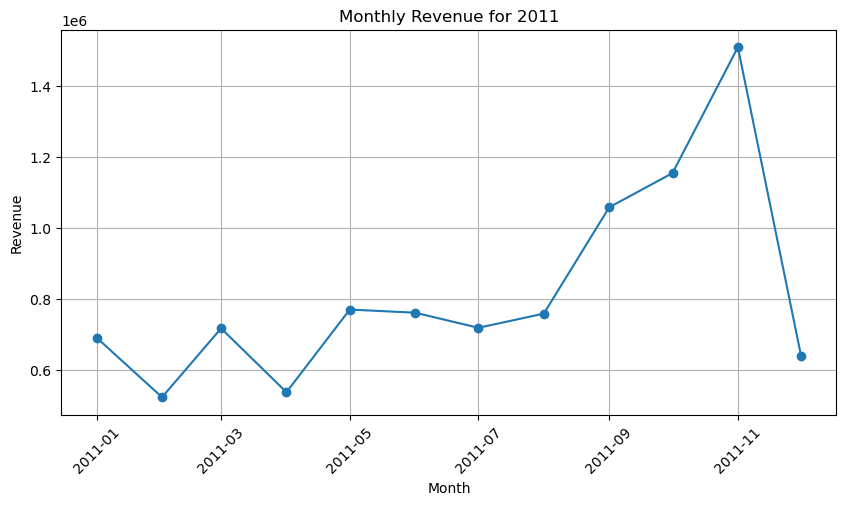

In [96]:


monthly_revenue = df_2011.groupby(df_2011['InvoiceDate'].dt.to_period('M'))['Revenue'].sum().reset_index()
monthly_revenue['InvoiceDate'] = monthly_revenue['InvoiceDate'].dt.to_timestamp()

plt.figure(figsize=(10, 5))
plt.plot(monthly_revenue['InvoiceDate'], monthly_revenue['Revenue'], marker='o')
plt.title('Monthly Revenue for 2011')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


Text(0, 0.5, 'Country')

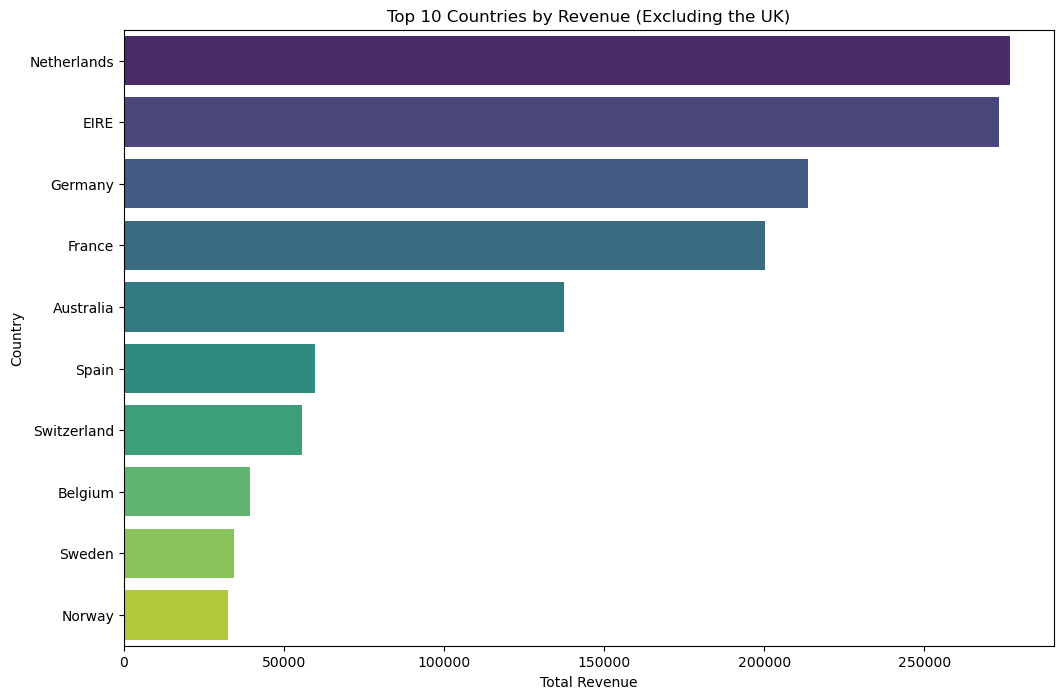

In [94]:
# --- Question 2: Top 10 Countries by Revenue (Excluding the UK) ---

# Exclude United Kingdom
df_no_uk = df_2011[df_2011['Country'] != 'United Kingdom']

# Aggregate revenue by country
country_revenue = df_no_uk.groupby('Country')['Revenue'].sum().reset_index()

# Get top 10 countries by revenue
top_countries = country_revenue.nlargest(10, 'Revenue')

# Plotting the top 10 countries
plt.figure(figsize=(12, 8))
sns.barplot(x='Revenue', y='Country', data=top_countries, palette='viridis')
plt.title('Top 10 Countries by Revenue (Excluding the UK)')
plt.xlabel('Total Revenue')
plt.ylabel('Country')

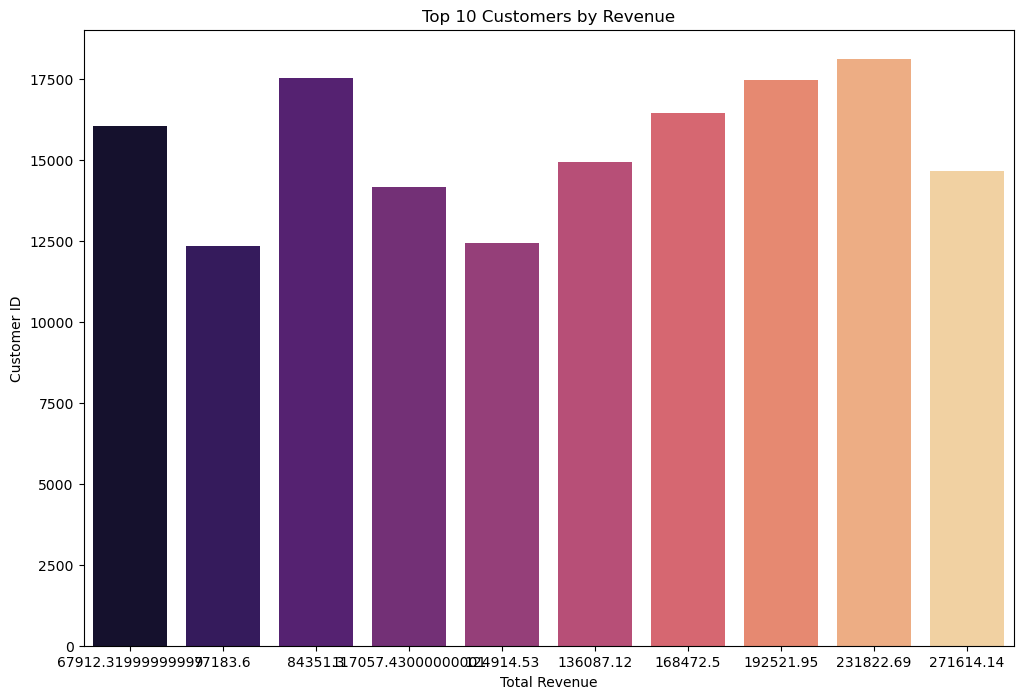

In [81]:
# --- Question 3: Top 10 Customers by Revenue ---

# Aggregate revenue by customer
customer_revenue = df_2011.groupby('CustomerID')['Revenue'].sum().reset_index()

# Get top 10 customers by revenue
top_customers = customer_revenue.nlargest(10, 'Revenue')

# Plotting the top 10 customers
plt.figure(figsize=(12, 8))
sns.barplot(x='Revenue', y='CustomerID', data=top_customers, palette='magma')
plt.title('Top 10 Customers by Revenue')
plt.xlabel('Total Revenue')
plt.ylabel('Customer ID')
plt.show()

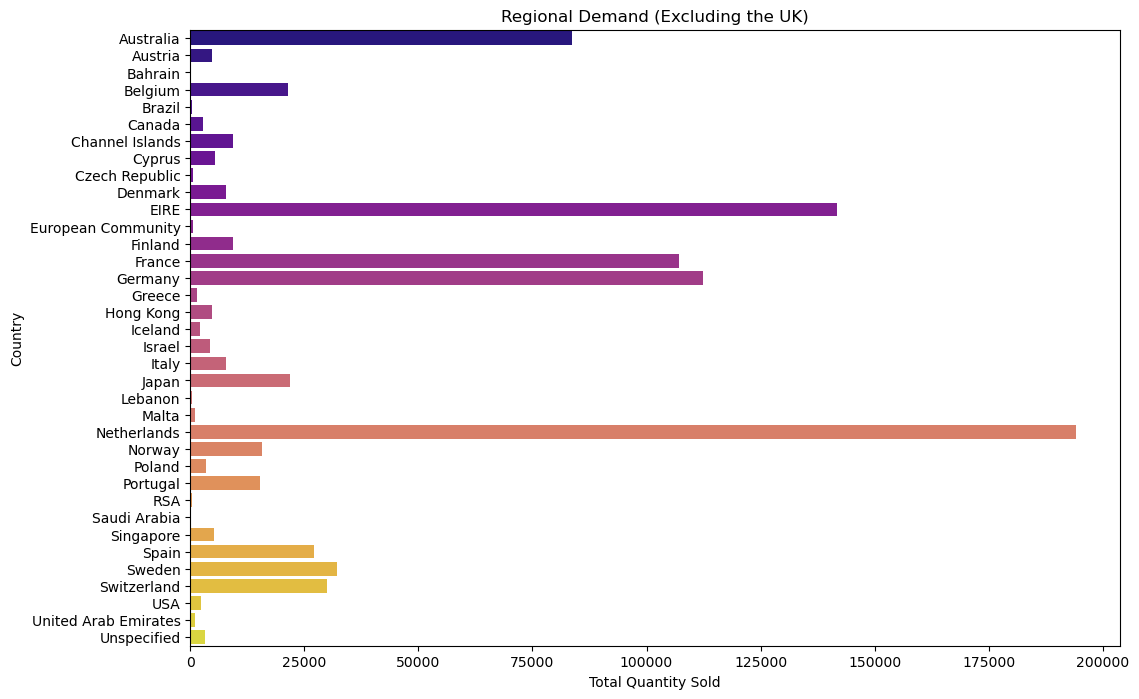

In [80]:
regional_demand = df_no_uk.groupby('Country')['Quantity'].sum().reset_index()

# Plotting regional demand
plt.figure(figsize=(12, 8))
sns.barplot(x='Quantity', y='Country', data=regional_demand, palette='plasma')
plt.title('Regional Demand (Excluding the UK)')
plt.xlabel('Total Quantity Sold')
plt.ylabel('Country')
plt.show()